Problem statement: Using the iris and diabetes data set on sklearn build a random forest model

In [125]:
#Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris, load_diabetes
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error

### Iris Dataset

In [2]:
#load dataset
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [4]:
pd.DataFrame(iris.data)

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


This dataset has 150 rows and 4 features

In [5]:
#View feature names
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
#view target names
iris.target_names #

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
#Build the model
features = iris.data
target = iris.target

In [8]:
#Split into train and test sets
x_train, x_test,y_train, y_test = train_test_split(features, target, test_size=0.4, random_state=42)

In [9]:
x_test.shape

(60, 4)

In [10]:
#instantiate the model
rf_model = RandomForestClassifier()
#Fit the data to the model
rf_model.fit(x_train, y_train)

RandomForestClassifier()

In [11]:
#generate predictions
y_pred = rf_model.predict(x_test)

In [12]:
#calculate score
rf_model.score(x_test, y_test)

0.9833333333333333

In [13]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       0.95      1.00      0.97        19
           2       1.00      0.94      0.97        18

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



In [14]:
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

[[23  0  0]
 [ 0 19  0]
 [ 0  1 17]]


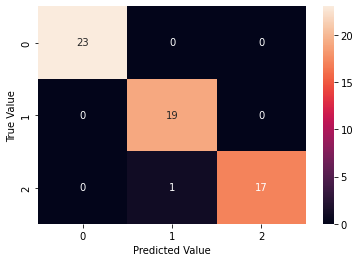

In [15]:
#Visualize the confusion matrix

sb.heatmap(conf_mat, annot = True)
plt.xlabel("Predicted Value")
plt.ylabel("True Value");

In [16]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### Diabetes Dataset

In [17]:
diabetes = load_diabetes()
dir(diabetes)

['DESCR',
 'data',
 'data_filename',
 'data_module',
 'feature_names',
 'frame',
 'target',
 'target_filename']

In [18]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [19]:
diabetes_features = diabetes.data
diabetes_target = diabetes.target


In [20]:
#Split into train and test sets
features_train, features_test,target_train, target_test = train_test_split(diabetes_features, diabetes_target, test_size=0.4, random_state=42)

In [117]:
#instantiate the model
diabetes_model = RandomForestRegressor(n_estimators=250, random_state=42)
#Fit the data to the model
diabetes_model.fit(features_train, target_train)

RandomForestRegressor(n_estimators=250, random_state=42)

In [118]:
#generate predictions
diabetes_pred = diabetes_model.predict(features_test)

In [119]:
#calculate score
diabetes_model.score(features_test, target_test)

0.5011320548146612

In [120]:
target_pred = diabetes_model.predict(features_test)

In [127]:

mse = mean_squared_error(target_test, target_pred)
rmse = mse**.5
print(mse)
print(rmse)

2918.476873943503
54.022929149977635
